C:\Users\andy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy score for the training set is 100.0 %
The accuracy score for the testing set is 88.88888888888889 %


(<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

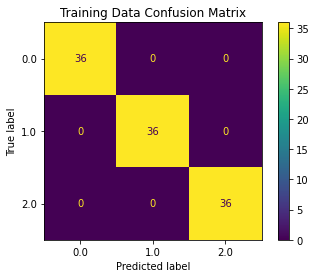

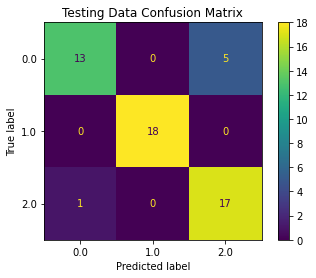

In [23]:
#all the imports for project stage 1
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from numpy import asarray
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os, os.path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



folderTraining=    # folder pathway for the training data (add the folder pathway for the dataset)
folderTesting=     # folder pathway for the testing data  (add the folder pathway for the dataset)
width = 5                                                         # desired width of use for each image
length = 10                                                        # desired length of use for each image
model = training(folderTraining,width,length)                      # call to the training function and returns Logistic regression model with the inputted training data set
testing(folderTesting,model,width,length)                          # call to the testing fucntions which returns the confustion matrix for the testing data. 

In [19]:
def training(path,width,length):                                                                                          #method heading training, takes in the parameters of folder pathway, width and length of the image
    imgData_train, class_label_train = getData(path,width,length)                                                         #Recieve Image Data and class label as matrix of the training dataset from getData()
    class_label_train = np.ravel(class_label_train)                                                                       #ravels the class_label_train input as a 1-D array, containing the elements of the input
    model = LogisticRegression()                                                                                          #Creating a Logistic Regression model
    model.fit(imgData_train,class_label_train)                                                                            #Fitting the model to the training dataset
    class_label_pred = model.predict(imgData_train)                                                                       #List of predicted values from the input from training data
    print(f'The accuracy score for the training set is {accuracy_score(class_label_train, class_label_pred)*100} %')      #Calculate the accuracy score from the given training data set
    conf_matrix = confusion_matrix(class_label_train, class_label_pred)                                                   #calculate the confustion matrix from the train class labels to the predicted class labels
    disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)                            #display the confustion matrix as an formatted image with true label vertically and the predicated label horizontally
    disp1.plot()                                                                                                          #plot the confusion matrix
    disp1.ax_.set_title('Training Data Confusion Matrix')                                                                 # set the title for the confusion matrix
    return model                                                                                                          #return the model of the Logistic Regression model trained with the training dataset
    

In [20]:
def testing(path, model, width , length):                                                           #method heading testing, takes in the parameters of folder pathway, width and length of the image, and the LogisticRegression model from the training dataset
        imgData_test, class_label_test = getData(path,width,length)                                 #Recieve Image Data and class label as matrix of the testing dataset from getData()
        class_label_pred = model.predict(imgData_test)                                              #List of predicted values from the input from testing data
        acc_score = accuracy_score(class_label_test,class_label_pred) * 100                         #Calculate the accuracy score from the given testing data set
        print(f'The accuracy score for the testing set is {acc_score} %')                           #print the accuracy score
        conf_matrix = confusion_matrix(class_label_test,class_label_pred)                           #calculate the confustion matrix from the test class labels to the predicted class labels
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)   #display the confustion matrix as an formatted image with true label vertically and the predicated label horizontally
        disp.plot()                                                                                 #plot the confusion matrix
        disp.ax_.set_title('Testing Data Confusion Matrix')                                         # set the title for the confusion matrix                                                                           
        return accuracy_score, confusion_matrix                                                     # return the value for the accuracy score and the confusion matrix

In [21]:
                                                    
def getData(dataFolder,width, length):                #method heading getData, takes in the parameters of folder pathway, width and length of the image
    data_path= os.listdir(dataFolder)                 #list of the file names in the folder of interest such as training and testing                       
    imgData= np.empty((len(data_path),width*length))  #creates an empty array of features for the image Data
    class_label = np.empty((len(data_path),1))        #creates an empty array of labels for the image Data                
    for i in range (len(data_path)):                  #a loop that iterates through the items in the folder of interest and appends a reshaped data array to the image data, which will be used as the X_train, X_test              
        pathway = dataFolder + '/' + data_path[i]     #creates a string for the pathway for each image    
        image = Image.open(pathway).convert('L')      #Uses the library Image to instantiate the image and converts it to greyscale
        image= image.resize((width,length))           # resizes the image to the width and length of users choice          
        image = asarray(image)                        #Converts the image to an array of data values           
        imgData[i,:] = image.reshape(1,-1)            # Converts and reshapes features of the image data to 1D array    
        
        
        #Since labels are in string value, we need to change it to a int value to name the labels
        # 0  means Circle
        # 1 means Rectangle
        # 2 means Square
        if 'cir' in data_path[i]:
              class_label[i,0] = 0
        if 'rec' in data_path[i]:
              class_label[i,0] = 1
        if 'squ' in data_path[i]:
              class_label[i,0] = 2
    return imgData,class_label                         #returns value for the reshaped image data and the integer converted class label describing each lego brick